In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)

In [2]:
df = pd.read_csv('All_players_stats.csv')
df.head()

,Season,Gamecode,Home,Player_ID,IsStarter,IsPlaying,Team,Dorsal,Player,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived,Valuation,Plusminus,gamecode,group,datetime,TeamScore,OpponentScore,PlayerName,total_fp
0,2023,1,1,P004720,0.0,1.0,RED,2,"LAZAREVIC, STEFAN",5.07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,-1.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,S. Lazarevic,1.1
1,2023,1,1,PJDR,0.0,1.0,RED,4,"TEODOSIC, MILOS",14.62,3,0,3,1,3,0,0,0,3,3,2,1,1,0,0,4,0,-1,6.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,M. Teodosic,-0.9
2,2023,1,1,P005099,0.0,1.0,RED,5,"HANGA, ADAM",22.35,7,1,6,1,5,2,2,1,3,4,3,2,1,1,0,1,3,9,4.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,A. Hanga,9.9
3,2023,1,1,P002553,0.0,1.0,RED,9,"MITROVIC, LUKA",21.53,9,3,3,0,0,3,4,1,0,1,2,1,0,0,0,2,4,14,20.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,L. Mitrovic,15.4
4,2023,1,1,PLUO,1.0,0.0,RED,10,"LAZIC, BRANKO",12.77,6,0,0,2,2,0,0,1,1,2,0,0,0,0,0,0,0,8,7.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,B. Lazic,8.8


In [3]:
df.Team.value_counts()

Team
OLY    576
ULK    562
PAN    561
TEL    558
BAR    552
MAD    548
MCO    540
BAS    527
VIR    516
IST    502
MIL    489
BER    482
MUN    478
RED    477
ZAL    476
PAR    476
ASV    464
PAM    408
PRS     72
Name: count, dtype: int64

C:\Users\SKolovos\AppData\Local\Temp\ipykernel_18652\436816813.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=team_column, y=metric_column, palette=palette)


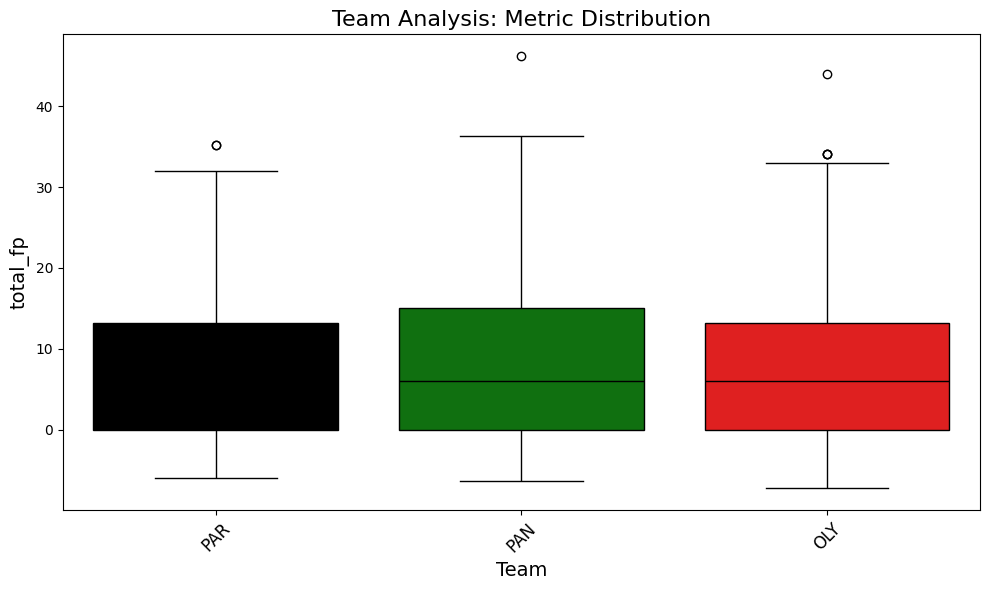

In [6]:
def create_team_boxplot(df, metric_column, team_column, selected_teams=None, team_colors=None):
    """
    Create a boxplot for selected teams with customizable colors.

    Args:
    - df: DataFrame containing the data.
    - metric_column: Name of the column with the metric to plot.
    - team_column: Name of the column with the team names.
    - selected_teams: List of teams to include in the plot (default: all teams).
    - team_colors: Dictionary mapping team names to colors (default: None).
    """
    # Filter for selected teams
    if selected_teams:
        df = df[df[team_column].isin(selected_teams)]
    
    # Set colors
    palette = team_colors if team_colors else "Set2"
    
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=team_column, y=metric_column, palette=palette)
    
    # Add titles and labels
    plt.title('Team Analysis: Metric Distribution', fontsize=16)
    plt.xlabel('Team', fontsize=14)
    plt.ylabel(metric_column, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage
# Define customizations
selected_teams = ['OLY', 'PAR', 'PAN']  # Teams to include in the plot
team_colors = {'OLY': 'red', 'PAR': 'black', 'PAN': 'green'}  # Colors for specific teams

# Call the function
create_team_boxplot(df, metric_column='total_fp', team_column='Team', selected_teams=selected_teams, team_colors=team_colors)

C:\Users\SKolovos\AppData\Local\Temp\ipykernel_18652\3328649057.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=team_column, y=metric_column, palette="Set2", linewidth=1.5)


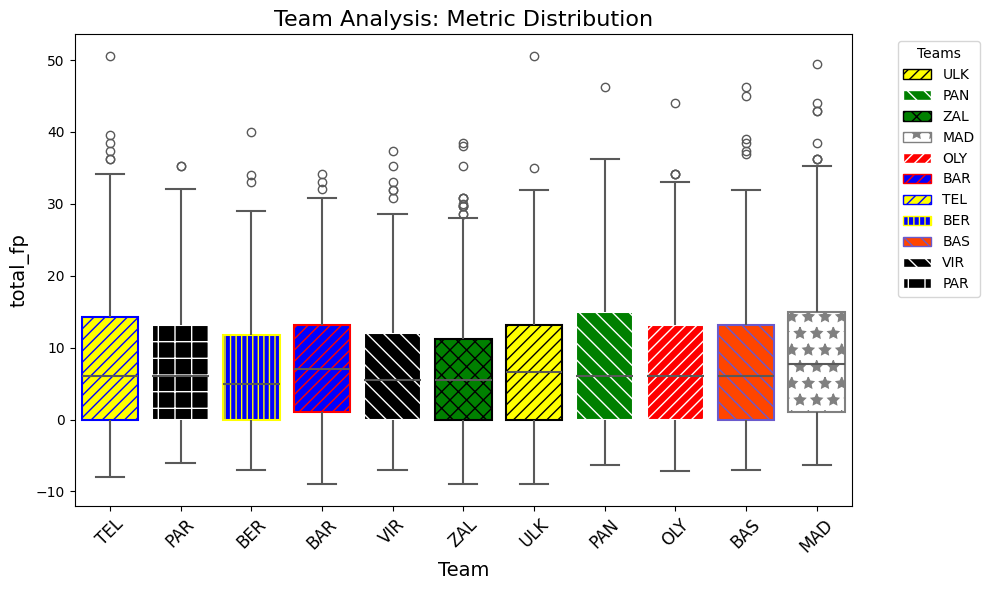

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def create_team_boxplot_with_patterns(df, metric_column, team_column, selected_teams=None, team_patterns=None):
    """
    Create a boxplot for selected teams with customizable patterns.

    Args:
    - df: DataFrame containing the data.
    - metric_column: Name of the column with the metric to plot.
    - team_column: Name of the column with the team names.
    - selected_teams: List of teams to include in the plot (default: all teams).
    - team_patterns: Dictionary mapping team names to patterns (default: None).
                      Format: {team_name: (facecolor, pattern, edgecolor)}
    """
    # Filter for selected teams
    if selected_teams:
        df = df[df[team_column].isin(selected_teams)]

    # Create the boxplot
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x=team_column, y=metric_column, palette="Set2", linewidth=1.5)

    # Apply patterns to specific teams
    if team_patterns:
        for patch, team_name in zip(ax.patches, df[team_column].unique()):
            if team_name in team_patterns:
                facecolor, pattern, edgecolor = team_patterns[team_name]
                # Add a striped pattern to the box
                patch.set_facecolor(facecolor)  # Base color
                patch.set_hatch(pattern)       # Pattern style
                patch.set_edgecolor(edgecolor)  # Edge color

    # Add titles and labels
    plt.title('Team Analysis: Metric Distribution', fontsize=16)
    plt.xlabel('Team', fontsize=14)
    plt.ylabel(metric_column, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)

    # Create a legend for patterns
    if team_patterns:
        legend_patches = [
            patches.Patch(facecolor=facecolor, edgecolor=edgecolor, hatch=pattern, label=team)
            for team, (facecolor, pattern, edgecolor) in team_patterns.items()
        ]
        plt.legend(handles=legend_patches, title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage
# Define customizations
selected_teams = ['ULK', 'PAN', 'ZAL', 'MAD', 'OLY', 'BAR', 'TEL','BER', 'BAS','VIR','PAR']
team_patterns = {
    'ULK': ('yellow', '///', 'black'),  # Yellow with diagonal stripes, black edge
    'PAN': ('green', '\\\\', 'white'),    # Blue with reverse diagonal stripes, dark blue edge
    'ZAL': ('green', 'xx', 'black'),
    'MAD': ('white', '*', 'gray'),
    'OLY': ('red', '///', 'white'),
    'BAR': ('blue', '///', 'red'),
    'TEL': ('yellow', '///', 'blue'),
    'BER': ('blue','|||', 'yellow' ),
    'BAS': ('orangered', '\\\\', 'slateblue'),
    'VIR': ('black', '\\\\', 'white'),
    'PAR': ('black', '+', 'white')
}

# Call the function
create_team_boxplot_with_patterns(df, metric_column='total_fp', team_column='Team', selected_teams=selected_teams, team_patterns=team_patterns)


In [29]:
df[df['Team']=='VIR'].Player.value_counts()

Player
BELINELLI, MARCO      42
SHENGELIA, TORNIKE    40
CORDINIER, ISAIA      38
PAJOLA, ALESSANDRO    38
HACKETT, DANIEL       38
LUNDBERG, IFFE        36
DUNSTON, BRYANT       36
ABASS, AWUDU          34
POLONARA, ACHILLE     32
DOBRIC, OGNJEN        30
MICKEY, JORDAN        26
ZIZIC, ANTE           25
CACOK, DEVONTAE       17
SMITH, JALEEN         16
MASCOLO, BRUNO        14
LOMAZS, RIHARDS       12
CLYBURN, WILL          7
MORGAN, MATTHEW        7
DIOUF, MOUHAMET        7
TUCKER, RAYJON         7
GRAZULIS, ANDREJS      6
AKELE, NICOLA          4
MENALO, LEO            2
VISCONTI, RICCARDO     2
Name: count, dtype: int64

In [24]:
df.Team.value_counts()

Team
OLY    576
ULK    562
PAN    561
TEL    558
BAR    552
MAD    548
MCO    540
BAS    527
VIR    516
IST    502
MIL    489
BER    482
MUN    478
RED    477
ZAL    476
PAR    476
ASV    464
PAM    408
PRS     72
Name: count, dtype: int64